In [429]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from matplotlib import style
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score, RocCurveDisplay

In [369]:
df = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')
print("First few rows of the dataset: ")
print(df.head())
print()
print("Summary: ")
print(df.info())
print()
print("")
print(df.describe())

First few rows of the dataset: 
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8

In [370]:
print("Missing values:- ")
print(df.isnull().sum())

Missing values:- 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [371]:
new_df.update(new_df.fillna(new_df.mean()))

In [375]:
next_df = pd.get_dummies(new_df,drop_first=True)
next_df

,Acidity,VolatileAcidity,CitricAcid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5,0


In [377]:
df['best quality'] = [ 1 if x>=7 else 0 for x in df.quality] 
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [379]:
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   
best quality               0.120061         -0.270712     0.214716   

In [381]:
df.rename(columns={
    'fixed acidity': 'Acidity',
    'volatile acidity': 'VolatileAcidity',
    'citric acid': 'CitricAcid'
}, inplace=True)
print("\nColumns after renaming:")
print(df.columns)


Columns after renaming:
Index(['Acidity', 'VolatileAcidity', 'CitricAcid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'best quality'],
      dtype='object')


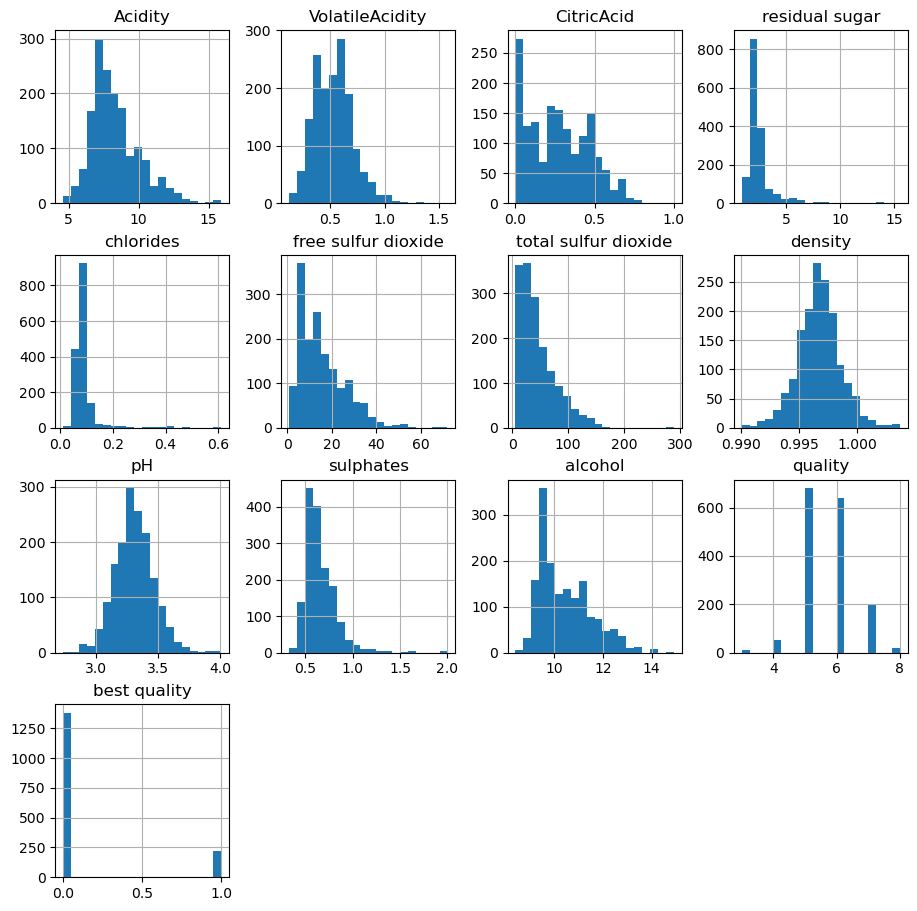

In [383]:
df.hist(bins=20, figsize=(11,11))
plt.show()

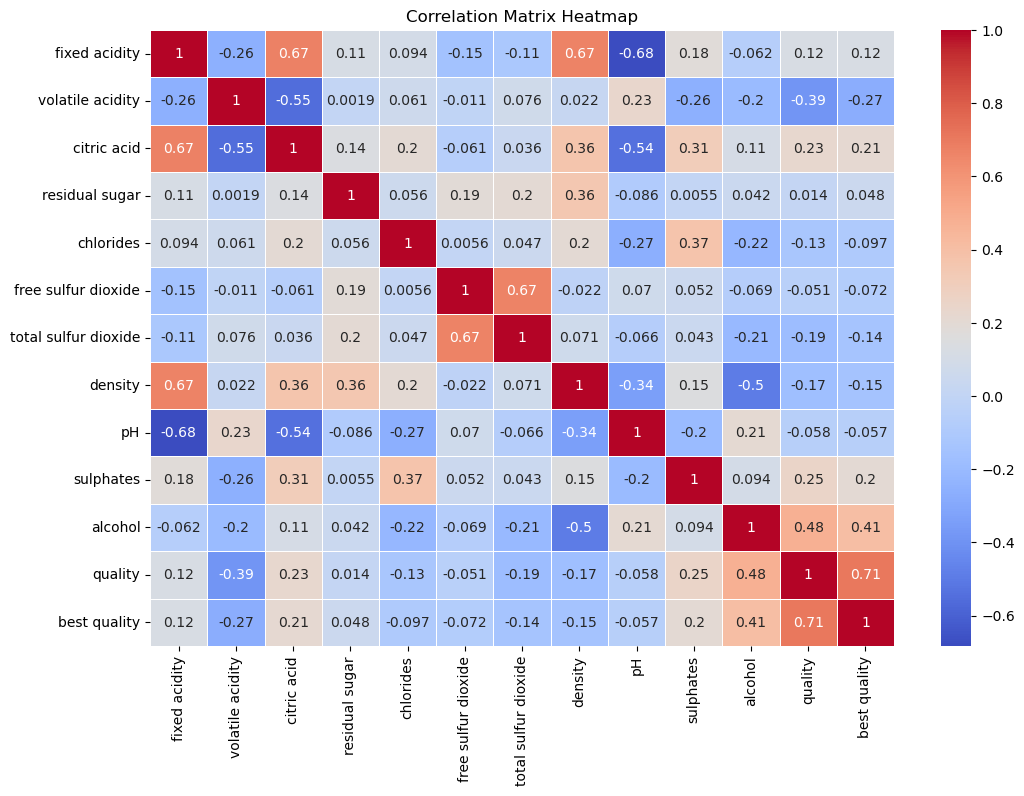

In [384]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

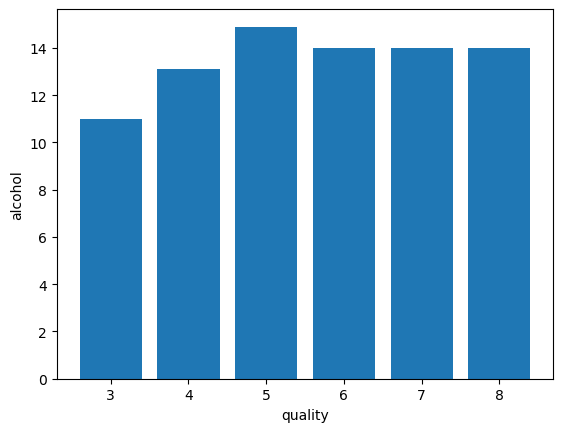

In [387]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

In [389]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

best quality


In [391]:
new_df=df.drop('total sulfur dioxide',axis=1)

In [393]:
X = df.drop(['quality', 'best quality'], axis=1)
y = df['best quality'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining data shape: {X_train.shape}, Test data shape: {X_test.shape}")


Training data shape: (1279, 11), Test data shape: (320, 11)


In [395]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm_fit = norm.fit(X_train)
X_train = norm_fit.transform(X_train)
X_test = norm_fit.transform(X_test)
print(X_train)

[[0.36283186 0.39041096 0.31       ... 0.58267717 0.22699387 0.49230769]
 [0.13274336 0.06164384 0.4        ... 0.4015748  0.13496933 0.53846154]
 [0.55752212 0.18493151 0.47       ... 0.44094488 0.23312883 0.21538462]
 ...
 [0.2300885  0.34246575 0.06       ... 0.60629921 0.10429448 0.16923077]
 [0.2920354  0.05479452 0.35       ... 0.45669291 0.26380368 0.53846154]
 [0.10619469 0.11643836 0.26       ... 0.51181102 0.10429448 0.78461538]]


In [399]:
x_predict = list(rnd.predict(X_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
803,5,0
124,5,0
350,5,0
682,5,0
1326,6,0
976,5,0
1493,5,0
706,5,0
613,6,0
1587,6,0


In [401]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("test accuracy is: {:.2f}%".format(logreg_acc*100))

test accuracy is: 86.88%


In [407]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       273
           1       0.73      0.17      0.28        47

    accuracy                           0.87       320
   macro avg       0.80      0.58      0.60       320
weighted avg       0.85      0.87      0.83       320



TN:  270
FN:  39
TP:  8
FP:  3


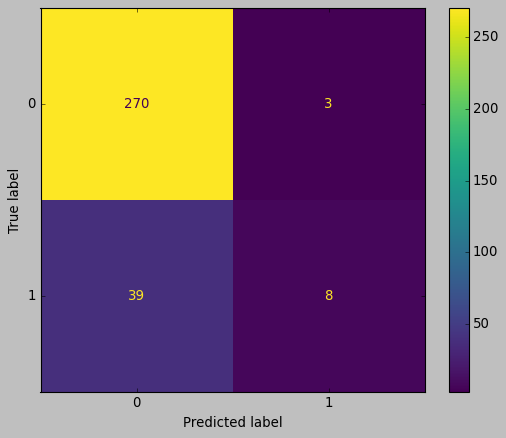

In [413]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=logreg.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [403]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 89.38%


In [415]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       273
           1       0.64      0.62      0.63        47

    accuracy                           0.89       320
   macro avg       0.79      0.78      0.78       320
weighted avg       0.89      0.89      0.89       320



TN:  257
FN:  18
TP:  29
FP:  16


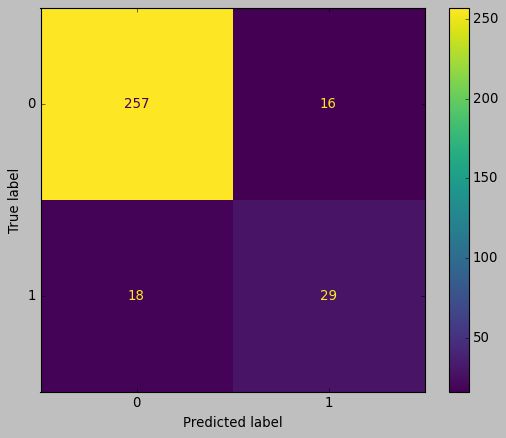

In [417]:
style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=dtree.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [405]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, y_test)
print("Test accuracy: {:.2f}%".format(rforest_acc*100))

Test accuracy: 90.62%


In [419]:
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       273
           1       0.74      0.55      0.63        47

    accuracy                           0.91       320
   macro avg       0.83      0.76      0.79       320
weighted avg       0.90      0.91      0.90       320



TN:  264
FN:  21
TP:  26
FP:  9


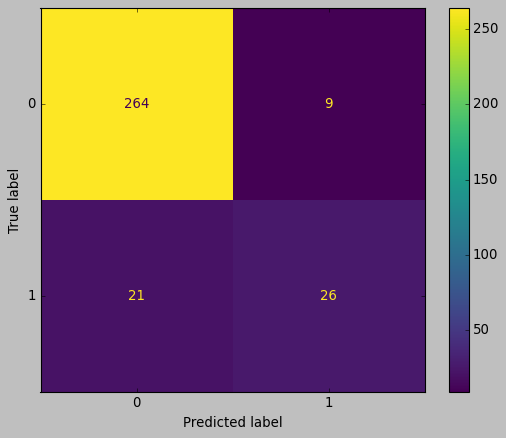

In [452]:
style.use('classic')
cm = confusion_matrix(y_test, rforest_pred, labels=rforest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=rforest.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])